In [11]:
import tensorflow as tf
import tensorflow_hub as tf_hub

In [12]:
#Check for GPU availability
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]


## Getting Data Ready i.e. turning them into tensors

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [17]:
labels_csv = pd.read_csv('data/labels.csv')
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,6047c362f38f0cef1fc26ea7ff7df0a1,scottish_deerhound
freq,1,126


In [16]:
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


<IPython.core.display.Javascript object>


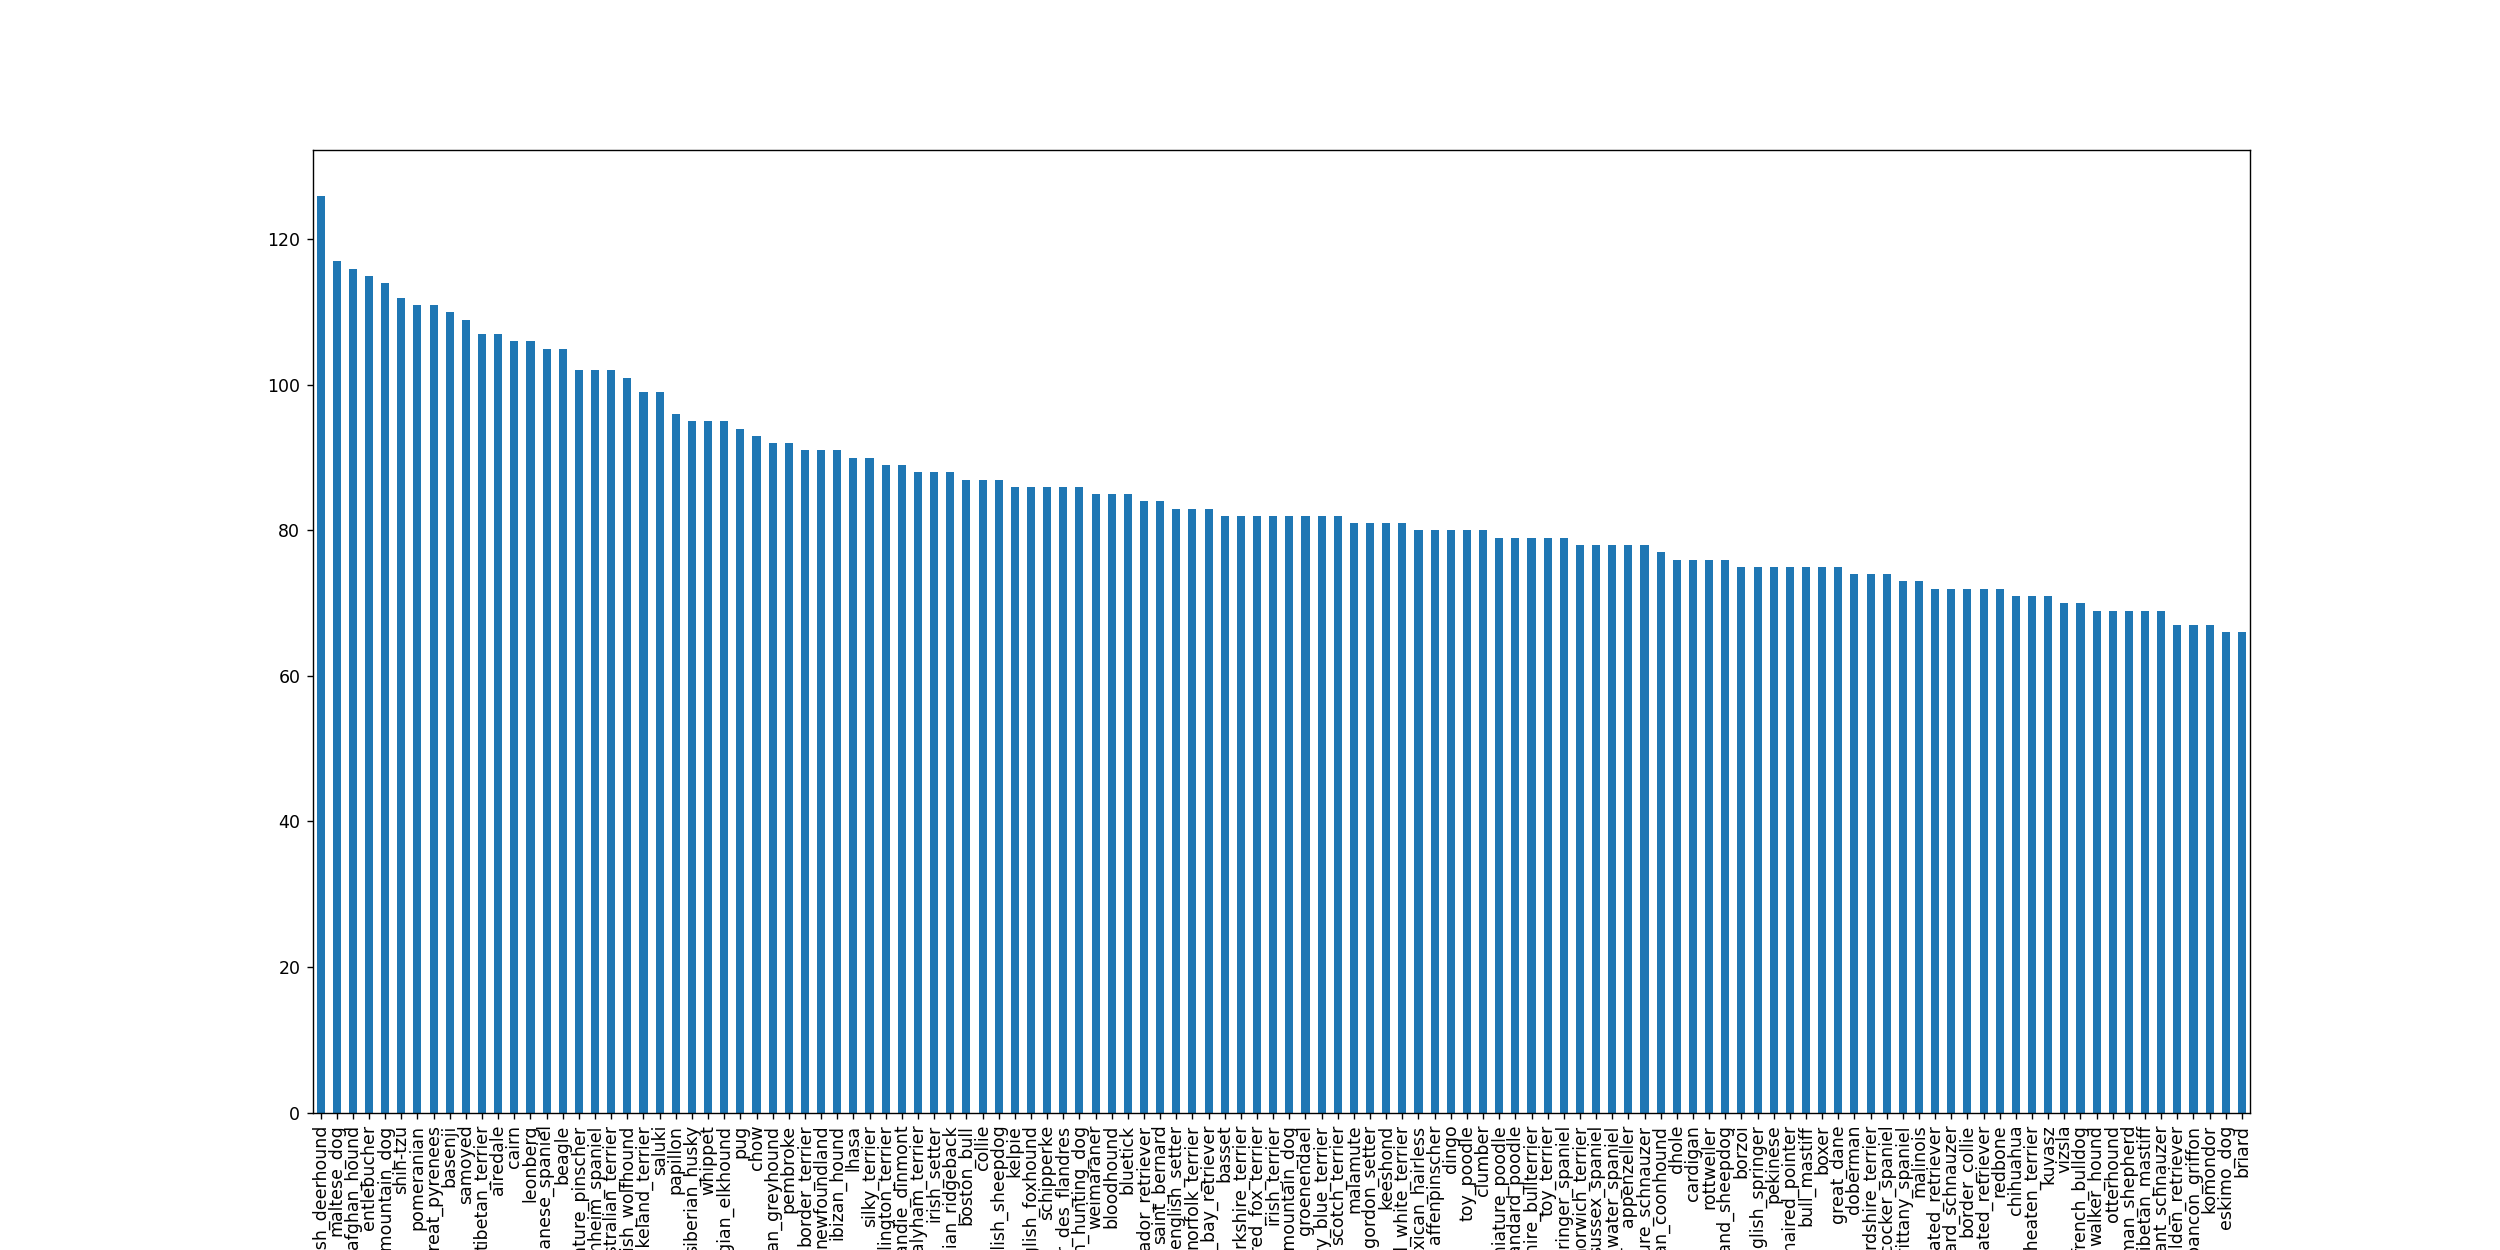

In [23]:
### Images for each Breed
%matplotlib notebook
labels_csv['breed'].value_counts().plot.bar(figsize = (20, 10))

In [28]:
labels_csv.breed.value_counts().median(), labels_csv.breed.value_counts().mean()

(82.0, 85.18333333333334)

## Preparing the Images

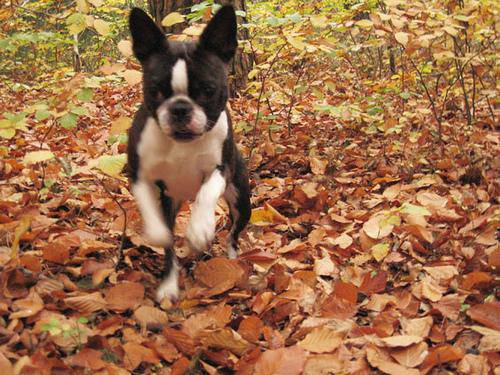

In [34]:
Image.open('data/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

<IPython.core.display.Javascript object>

TypeError: Image data of dtype <U47 cannot be converted to float